In [146]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [160]:
import sys

sys.path.insert(0, "../")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import config
from audio import audio_to_melspectrogram, show_melspectrogram
from utils import load_labels

<IPython.core.display.Javascript object>

# Data and Visualization

In [148]:
# read data
X_train = np.load("../data/DOCC10_train/DOCC10_Xtrain.npy")
X_test = np.load("../data/DOCC10_test/DOCC10_Xtest.npy")
Y_train_df = pd.read_csv("../data/DOCC10_train/DOCC10_Ytrain.csv", index_col=0)

print("X train", X_train.shape, "Y_train", Y_train_df.shape, "X_test", X_test.shape)

X train (113120, 8192) Y_train (113120, 1) X_test (20960, 8192)


<IPython.core.display.Javascript object>

In [153]:
Y_train_df.values

array([['UDA'],
       ['UDA'],
       ['UDA'],
       ...,
       ['MB'],
       ['MB'],
       ['MB']], dtype=object)

<IPython.core.display.Javascript object>

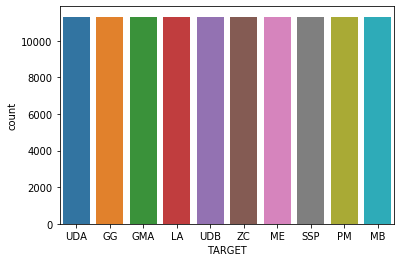

<IPython.core.display.Javascript object>

In [141]:
# Perfectly balanced, as all things should be
sns.countplot(x="TARGET", data=Y_train_df)
plt.show()

In [142]:
def show_clicks(n_plots, classes):
    fig, axes = plt.subplots(n_plots, len(classes), figsize=(10, 2 * n_plots))
    for j in range(len(classes)):
        X_sub = X_train[(Y_train_df == classes[j]).values.flatten()]
        axes[0, j].set_title(classes[j])
        for i in range(n_plots):
            idx = np.random.randint(len(X_sub))
            axes[i, j].plot(X_sub[idx])
            axes[i, j].get_xaxis().set_visible(False)
            axes[i, j].get_yaxis().set_visible(False)
    plt.show()

<IPython.core.display.Javascript object>

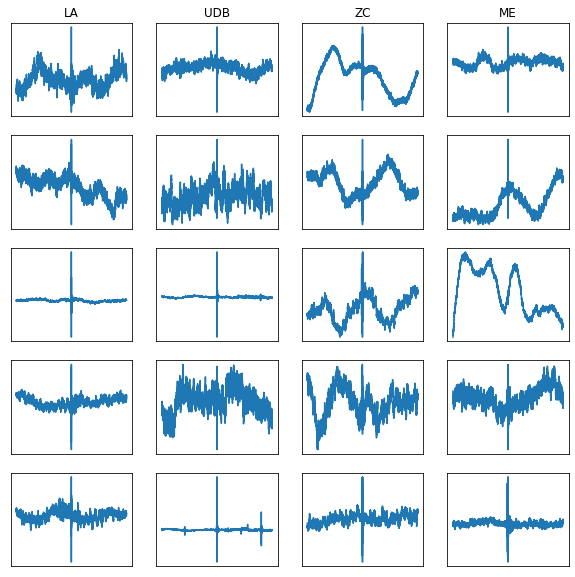

<IPython.core.display.Javascript object>

In [143]:
classes = ["LA", "UDB", "ZC", "ME"]
show_clicks(5, classes)

## Spectrograms

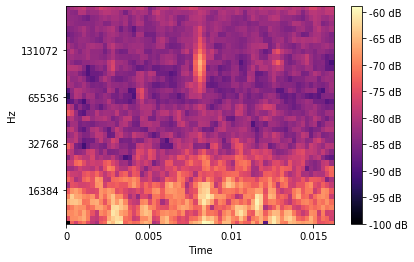

<IPython.core.display.Javascript object>

In [150]:
show_melspectrogram(audio_to_melspectrogram(X_train[0]))